**Note:** place file one level up in directory structure so it can run properly.

# Analyzing Baseball Fan Sentiment with Twitter Data #

In [2]:
import glob
import pandas as pd
import numpy as np

# For working with JSON data.
try:
    import json
except ImportError:
    import simplejson as json
    
# For maps.
from mpl_toolkits.basemap import Basemap
import geocoder
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.simplefilter(action = "ignore", category = FutureWarning)

## Intial Exploration (10,000 Tweets Version) ##

In [184]:
for filename in glob.iglob('data/redsox/*.txt'):
     print(filename)

data/redsox/redsox_search_08_06_1000.txt
data/redsox/redsox_search_08_07_1000.txt
data/redsox/redsox_search_08_08_1000.txt
data/redsox/redsox_search_08_09_1000.txt
data/redsox/redsox_search_08_10_1000.txt
data/redsox/redsox_search_08_11_1000.txt
data/redsox/redsox_search_08_12_1000.txt
data/redsox/redsox_search_08_13_1000.txt
data/redsox/redsox_search_08_15_1000.txt
data/redsox/redsox_search_08_16_1000.txt
data/redsox/redsox_stream_08_14_1000.txt


In [185]:
# Read in JSON data and store in pandas DataFrame.
tweets = []
locations = []
for filename in glob.iglob('data/redsox/*.txt'):
    tweets_filename = filename
    tweets_file = open(tweets_filename, "r")
    for line in tweets_file:
        try:
            # Read in each line of file, convert to JSON object. 
            tweet = json.loads(line.strip())
            # Make sure tweet has text content.
            if 'text' in tweet:
                tweets.append(tweet)
                locations.append(tweet['user']['location'])
        except:
            # Skip any non-JSON-formatted data that may have been captured.
            continue

In [186]:
df_redsox_all = pd.DataFrame(tweets)

In [187]:
df_redsox_all['location'] = pd.Series(locations)

In [188]:
df_redsox_all.shape

(11000, 33)

In [189]:
df_redsox_all.head(3)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,filter_level,geo,id,...,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,location
0,None,None,Sat Aug 06 23:59:36 +0000 2016,"{'user_mentions': [], 'urls': [{'url': 'https:...","{'media': [{'sizes': {'thumb': {'w': 150, 'h':...",0,False,NaN,None,762075686232207360,...,NaN,0,False,NaN,"<a href=""http://dlvr.it"" rel=""nofollow"">dlvr.i...","Boston #RedSox Ladies #Shirt. Gray, Red, and B...",NaN,False,"{'location': '', 'id': 711894430303789056, 'id...",
1,None,None,Sat Aug 06 23:59:34 +0000 2016,"{'user_mentions': [], 'urls': [{'url': 'https:...","{'media': [{'sizes': {'thumb': {'w': 150, 'h':...",0,False,NaN,None,762075674534223872,...,NaN,0,False,NaN,"<a href=""http://dlvr.it"" rel=""nofollow"">dlvr.i...","#MLB #BaseBall: New and rare, Boston #RedSox T...",NaN,False,"{'location': '', 'id': 711894430303789056, 'id...",
2,None,None,Sat Aug 06 23:59:27 +0000 2016,"{'user_mentions': [{'id_str': '3305485520', 's...",{'media': [{'expanded_url': 'http://twitter.co...,0,False,NaN,None,762075645136568320,...,NaN,41,False,"{'is_quote_status': False, 'contributors': Non...","<a href=""http://twitter.com/download/iphone"" r...",RT @_AlexanderJean_: Honored to sing The Natio...,NaN,False,"{'location': '7/21/15 | 3/8/16 | 7/7/16', 'id'...",7/21/15 | 3/8/16 | 7/7/16


In [190]:
#df_redsox_all['retweet_count'].value_counts()

In [191]:
df_redsox = df_redsox_all[['text', 'created_at', 'location', 'retweet_count', 'favorite_count']]

In [192]:
df_redsox.shape

(11000, 5)

In [193]:
df_redsox.head(10)

,text,created_at,location,retweet_count,favorite_count
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,,0,0
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,,0,0
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1
5,RT @RedSox: RECAP:#RedSox fall to the Dodgers ...,Sat Aug 06 23:59:02 +0000 2016,,29,0
6,RT @RedSox: It's about that time! 🇺🇸 https://t...,Sat Aug 06 23:58:50 +0000 2016,Redondo Beach Ca,75,0
7,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:58:06 +0000 2016,"Batavia, NY",41,0
8,Tune in for game 2 of the east division semi f...,Sat Aug 06 23:58:04 +0000 2016,"Orleans, MA",1,0
9,RT @RedSox: RECAP:#RedSox fall to the Dodgers ...,Sat Aug 06 23:58:01 +0000 2016,"La Vega, Dominican Republic",29,0


In [94]:
# DONT USE
lats = []
longs = []
for location in df_redsox['location']:
    g = geocoder.arcgis(location)
    if g.latlng != []:
        lats.append(g.latlng[0])
        longs.append(g.latlng[1])
    else:
        lats.append(np.nan)
        longs.append(np.nan)

In [194]:
unique_locations = df_redsox['location'].unique()

In [195]:
len(unique_locations)
#unique_locations = unique_locations[:10]
#unique_locations

2706

In [196]:
# USE THIS
location_coords = {}
for location in unique_locations:
    location_coords[location] = geocoder.arcgis(location)

In [200]:
location_coords[''].latlng

[]

In [201]:
df_beginning = df_redsox[:100]

In [205]:
df_beginning.head()

,text,created_at,location,retweet_count,favorite_count
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,,0,0
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,,0,0
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1


In [202]:
def get_lat(x):
    if x.latlng != []:
        return(x.latlng[0])
    else:
        return(np.nan)

In [209]:
def get_long(x):
    if x.latlng != []:
        return(x.latlng[1])
    else:
        return(np.nan)

In [210]:
df_beginning['lat'] = df_beginning['location'].apply(lambda x: get_lat(location_coords[x]))
df_beginning['long'] = df_beginning['location'].apply(lambda x: get_long(location_coords[x]))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [204]:
get_lat(location_coords['Boston, MA'])

42.35842800500046

In [212]:
df_redsox['latitude'] = df_redsox['location'].apply(lambda x: get_lat(location_coords[x]))
df_redsox['longitude'] = df_redsox['location'].apply(lambda x: get_long(location_coords[x]))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [213]:
df_redsox.head(20)

,text,created_at,location,retweet_count,favorite_count,latitude,longitude
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,,0,0,NaN,NaN
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,,0,0,NaN,NaN
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0,NaN,NaN
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2,34.052228,-118.243677
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317
5,RT @RedSox: RECAP:#RedSox fall to the Dodgers ...,Sat Aug 06 23:59:02 +0000 2016,,29,0,NaN,NaN
6,RT @RedSox: It's about that time! 🇺🇸 https://t...,Sat Aug 06 23:58:50 +0000 2016,Redondo Beach Ca,75,0,33.849179,-118.388407
7,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:58:06 +0000 2016,"Batavia, NY",41,0,42.998118,-78.187516
8,Tune in for game 2 of the east division semi f...,Sat Aug 06 23:58:04 +0000 2016,"Orleans, MA",1,0,41.789827,-69.989739
9,RT @RedSox: RECAP:#RedSox fall to the Dodgers ...,Sat Aug 06 23:58:01 +0000 2016,"La Vega, Dominican Republic",29,0,19.222066,-70.529556


In [170]:
#g = geocoder.arcgis(df_redsox['location'][3])
#g.latlng

[34.052228079000486, -118.24367736899967]

In [108]:
#df_redsox['location'][:10].apply(geocoder.arcgis)

0        <[ERROR - No results found] Arcgis - Geocode>
1        <[ERROR - No results found] Arcgis - Geocode>
2        <[ERROR - No results found] Arcgis - Geocode>
3    <[OK] Arcgis - Geocode [Los Angeles, Californi...
4    <[OK] Arcgis - Geocode [Massachusetts, United ...
5        <[ERROR - No results found] Arcgis - Geocode>
6    <[OK] Arcgis - Geocode [Redondo Beach, Califor...
7    <[OK] Arcgis - Geocode [Batavia, New York, Uni...
8    <[OK] Arcgis - Geocode [Orleans, Massachusetts...
9    <[OK] Arcgis - Geocode [Concepción de La Vega,...
Name: location, dtype: object

In [96]:
#print(len(lats))
#print(len(longs))

11000
11000


In [97]:
#df_redsox['latitude'] = pd.Series(lats)
#df_redsox['longitude'] = pd.Series(longs)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [214]:
df_redsox['created_at'].dtypes

dtype('O')

In [215]:
df_redsox['created_at'].head()

0    Sat Aug 06 23:59:36 +0000 2016
1    Sat Aug 06 23:59:34 +0000 2016
2    Sat Aug 06 23:59:27 +0000 2016
3    Sat Aug 06 23:59:19 +0000 2016
4    Sat Aug 06 23:59:19 +0000 2016
Name: created_at, dtype: object

In [216]:
# First, parse to datetime, then get YYYY-MM-DD format.
df_redsox['time'] = pd.to_datetime(df_redsox['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
df_redsox['time'] = pd.to_datetime(df_redsox['time'].dt.date, format='%Y-%m-%d')
#date = datetime.strptime('Thu Apr 23 13:38:19 +0000 2009','%a %b %d %H:%M:%S +0000 %Y')
#date = datetime.strftime(date, '%Y %d %m')
#type(date)
#df_redsox['time'].dtypes

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [217]:
df_redsox.head(10)

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,time
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,,0,0,NaN,NaN,2016-08-06
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,,0,0,NaN,NaN,2016-08-06
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0,NaN,NaN,2016-08-06
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2,34.052228,-118.243677,2016-08-06
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317,2016-08-06
5,RT @RedSox: RECAP:#RedSox fall to the Dodgers ...,Sat Aug 06 23:59:02 +0000 2016,,29,0,NaN,NaN,2016-08-06
6,RT @RedSox: It's about that time! 🇺🇸 https://t...,Sat Aug 06 23:58:50 +0000 2016,Redondo Beach Ca,75,0,33.849179,-118.388407,2016-08-06
7,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:58:06 +0000 2016,"Batavia, NY",41,0,42.998118,-78.187516,2016-08-06
8,Tune in for game 2 of the east division semi f...,Sat Aug 06 23:58:04 +0000 2016,"Orleans, MA",1,0,41.789827,-69.989739,2016-08-06
9,RT @RedSox: RECAP:#RedSox fall to the Dodgers ...,Sat Aug 06 23:58:01 +0000 2016,"La Vega, Dominican Republic",29,0,19.222066,-70.529556,2016-08-06


In [413]:
retweet_count = df_redsox['retweet_count'].tolist()
retweet_count = [count + 100 for count in retweet_count]

In [405]:
favorite_count = df_redsox['favorite_count'].tolist()
favorite_count = [count + 100 for count in favorite_count]

In [406]:
dates = [int(time.timestamp()) for time in df_redsox['time']]

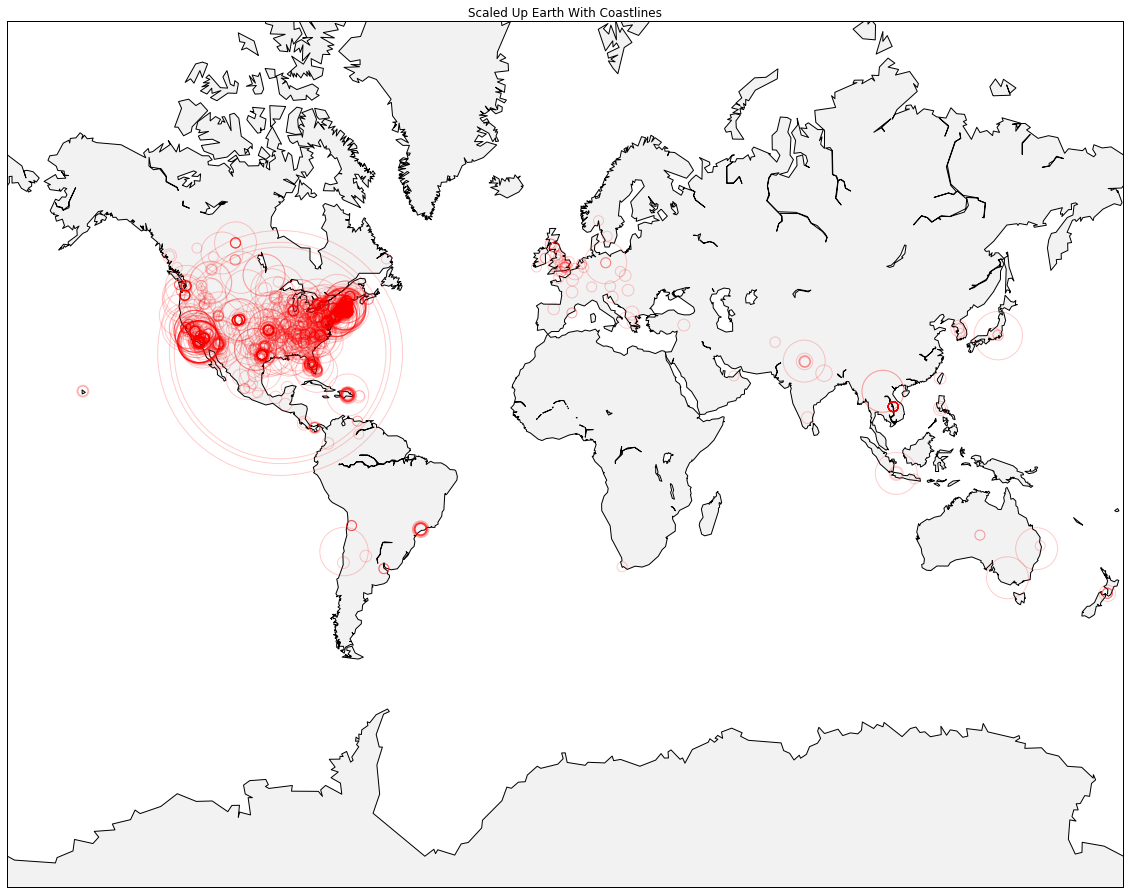

In [428]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_title("Scaled Up Earth With Coastlines")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x, y = m(df_redsox['longitude'].tolist(), df_redsox['latitude'].tolist())
m.scatter(x, y, s=retweet_count, alpha=0.2, facecolors='none', edgecolors='r', zorder=10)
#m.scatter(x, y, s=600, alpha=0.1, facecolors='none', edgecolors='r')
m.drawcoastlines()
m.fillcontinents(color='#f2f2f2',lake_color='white')
#m.drawstates()
plt.show()

In [209]:
#from matplotlib.colors import rgb2hex
#from matplotlib.colors import Normalize, PowerNorm
#from matplotlib.patches import Polygon

In [367]:
from matplotlib.colors import ListedColormap

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#sns.set_palette(flatui)
# construct cmap
my_cmap = ListedColormap(flatui)

#N = 500
#data1 = np.random.randn(N)
#data2 = np.random.randn(N)
#colors = np.linspace(0,1,N)


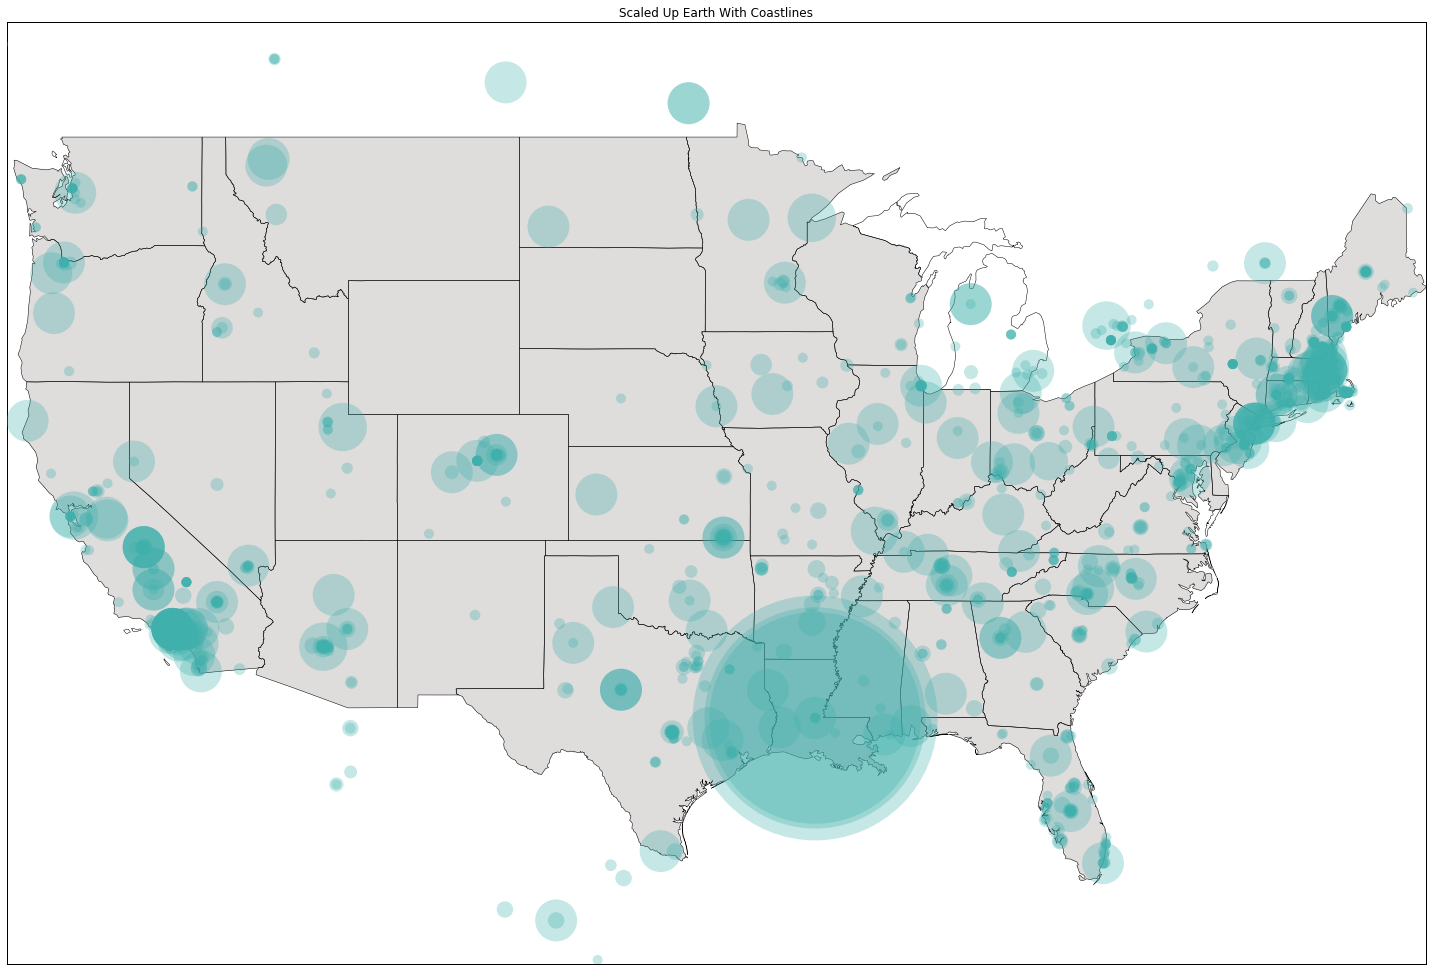

In [622]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_title("Scaled Up Earth With Coastlines")
#ax.set_axis_bgcolor('#EDEDED')
#m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m = Basemap(llcrnrlon=-125,llcrnrlat=22,urcrnrlon=-67,urcrnrlat=52,
            projection='merc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
m.readshapefile('states_21basic/states', name='states', drawbounds=True)
x, y = m(df_redsox['longitude'].tolist(), df_redsox['latitude'].tolist())
m.scatter(x, y, s=retweet_count, c='#3fb0ac', alpha=0.3, edgecolors='none', zorder=10)

#m.scatter(x, y, s=retweet_count, c=dates, cmap=my_cmap, alpha=0.5, edgecolors='white')

#m.drawstates(color='green')
#m.drawcoastlines(color='black')
#m.drawcoastlines(color='#32b181')

state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['STATE_ABBR'])

for state in state_names:
    seg = m.states[state_names.index(state)]
    poly = Polygon(seg, facecolor='#DFDCDC', edgecolor='none')
    ax.add_patch(poly)

plt.tight_layout()
#plt.colorbar()
plt.show()

## Sentiment Analysis ##

In [218]:
df_redsox.head()

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,time
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,,0,0,NaN,NaN,2016-08-06
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,,0,0,NaN,NaN,2016-08-06
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0,NaN,NaN,2016-08-06
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2,34.052228,-118.243677,2016-08-06
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317,2016-08-06


In [219]:
from textblob import TextBlob

In [220]:
tweets = df_redsox['text']
sentiments = []
for tweet in tweets:
    wiki = TextBlob(tweet)
    sentiments.append(wiki.sentiment.polarity)

In [221]:
df_redsox['sentiment'] = pd.Series(sentiments)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [222]:
df_redsox.head()

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,time,sentiment
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,,0,0,NaN,NaN,2016-08-06,0.071429
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,,0,0,NaN,NaN,2016-08-06,0.218182
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0,NaN,NaN,2016-08-06,-0.400000
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2,34.052228,-118.243677,2016-08-06,-0.600000
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317,2016-08-06,0.000000


In [223]:
#df_redsox.to_csv('df_redsox.csv')

In [241]:
g = geocoder.arcgis('Boston, MA')
boston_lat = g.latlng[0]
boston_long = g.latlng[1]
print(boston_lat, boston_long)

42.35842800500046 -71.05976636899965


In [242]:
import gpxpy.geo
import math
haversine_distances = []
for i in range(df_redsox.shape[0]):
#dist = gpxpy.geo.haversine_distance(52.2296756, 21.0122287, 52.406374, 16.9251681)
#print(dist)
    if math.isnan(df_redsox.iloc[i]['latitude']):
        haversine_distances.append(np.nan)
    else:
        distance = gpxpy.geo.haversine_distance(boston_lat, boston_long, df_redsox.iloc[i]['latitude'], df_redsox.iloc[i]['longitude'])
        haversine_distances.append(distance)

In [244]:
len(haversine_distances)

11000

In [245]:
df_redsox['hav_distance'] = pd.Series(haversine_distances)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [246]:
df_redsox.head()

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,time,sentiment,hav_distance
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,,0,0,NaN,NaN,2016-08-06,0.071429,NaN
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,,0,0,NaN,NaN,2016-08-06,0.218182,NaN
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0,NaN,NaN,2016-08-06,-0.400000,NaN
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2,34.052228,-118.243677,2016-08-06,-0.600000,4.169543e+06
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317,2016-08-06,0.000000,4.069056e+03


In [248]:
df_redsox.rename(columns={'time': 'dates'}, inplace=True)

//anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [249]:
df_redsox.head()

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,dates,sentiment,hav_distance
0,"Boston #RedSox Ladies #Shirt. Gray, Red, and B...",Sat Aug 06 23:59:36 +0000 2016,,0,0,NaN,NaN,2016-08-06,0.071429,NaN
1,"#MLB #BaseBall: New and rare, Boston #RedSox T...",Sat Aug 06 23:59:34 +0000 2016,,0,0,NaN,NaN,2016-08-06,0.218182,NaN
2,RT @_AlexanderJean_: Honored to sing The Natio...,Sat Aug 06 23:59:27 +0000 2016,7/21/15 | 3/8/16 | 7/7/16,41,0,NaN,NaN,2016-08-06,-0.400000,NaN
3,May not have got the W but I got to see @david...,Sat Aug 06 23:59:19 +0000 2016,"Los Angeles, CA",0,2,34.052228,-118.243677,2016-08-06,-0.600000,4.169543e+06
4,@aidancab @RedSox foreal 😴,Sat Aug 06 23:59:19 +0000 2016,MA,0,1,42.365650,-71.108317,2016-08-06,0.000000,4.069056e+03


In [250]:
df_redsox.to_csv('df_redsox.csv')

In [251]:
df_redsox.columns

Index(['text', 'created_at', 'location', 'retweet_count', 'favorite_count',
       'latitude', 'longitude', 'dates', 'sentiment', 'hav_distance'],
      dtype='object')

In [482]:
text_file = open('sentiment_redsox.txt', 'w')
for i in range(df_redsox.shape[0]):
    text_file.write(df_redsox.iloc[i]['text'])
    text_file.write('(%f)' %df_redsox.iloc[i]['sentiment'])
    text_file.write('\n')
text_file.close()

In [542]:
redsox_high_pos_df = df_redsox[df_redsox['sentiment'] >= 0.7]
redsox_pos_df = df_redsox[(df_redsox['sentiment'] < 0.7) & (df_redsox['sentiment'] >= 0.4)]
redsox_neutral_df = df_redsox[(df_redsox['sentiment'] < 0.4) & (df_redsox['sentiment'] > -0.4)]
redsox_neg_df = df_redsox[(df_redsox['sentiment'] <= -0.4) & (df_redsox['sentiment'] > -0.7)]
redsox_high_neg_df = df_redsox[df_redsox['sentiment'] <= -0.7]

In [513]:
text_file = open('redsox_high_pos.txt', 'w')
for i in range(redsox_high_pos_df.shape[0]):
    text_file.write(redsox_high_pos_df.iloc[i]['text'])
    text_file.write('(%f)' %redsox_high_pos_df.iloc[i]['sentiment'])
    text_file.write('\n')
text_file.close()

In [508]:
text_file = open('redsox_pos.txt', 'w')
for i in range(redsox_pos_df.shape[0]):
    text_file.write(redsox_pos_df.iloc[i]['text'])
    text_file.write('(%f)' %redsox_pos_df.iloc[i]['sentiment'])
    text_file.write('\n')
text_file.close()

In [509]:
text_file = open('neg_redsox.txt', 'w')
for i in range(redsox_neg_df.shape[0]):
    text_file.write(redsox_neg_df.iloc[i]['text'])
    text_file.write('(%f)' %redsox_neg_df.iloc[i]['sentiment'])
    text_file.write('\n')
text_file.close()

In [510]:
text_file = open('redsox_neutral.txt', 'w')
for i in range(redsox_neutral_df.shape[0]):
    text_file.write(redsox_neutral_df.iloc[i]['text'])
    text_file.write('(%f)' %redsox_neutral_df.iloc[i]['sentiment'])
    text_file.write('\n')
text_file.close()

In [511]:
text_file = open('redsox_neg.txt', 'w')
for i in range(redsox_neg_df.shape[0]):
    text_file.write(redsox_neg_df.iloc[i]['text'])
    text_file.write('(%f)' %redsox_neg_df.iloc[i]['sentiment'])
    text_file.write('\n')
text_file.close()

In [512]:
text_file = open('redsox_high_neg.txt', 'w')
for i in range(redsox_high_neg_df.shape[0]):
    text_file.write(redsox_high_neg_df.iloc[i]['text'])
    text_file.write('(%f)' %redsox_high_neg_df.iloc[i]['sentiment'])
    text_file.write('\n')
text_file.close()

In [624]:
retweet_count_hp = redsox_high_pos_df['retweet_count'].tolist()
retweet_count_hp = [count + ((count + 1000)*.50) for count in retweet_count_hp]

retweet_count_hn = redsox_high_neg_df['retweet_count'].tolist()
retweet_count_hn = [count + ((count + 1000)*.50) for count in retweet_count_hn]

retweet_count_p = redsox_pos_df['retweet_count'].tolist()
retweet_count_p = [count + ((count + 600)*.50) for count in retweet_count_p]

retweet_count_n = redsox_neg_df['retweet_count'].tolist()
retweet_count_n = [count + ((count + 600)*.50) for count in retweet_count_n]

retweet_count_neu = redsox_neutral_df['retweet_count'].tolist()
retweet_count_neu = [count + ((count + 1)*.30) for count in retweet_count_neu]

In [571]:
high_rt = redsox_high_neg_df[redsox_high_neg_df['retweet_count'] > 40000]
high_rt

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,time,sentiment
1514,RT @RomanAtwood: The cop car is GONE!! Tomorro...,Sun Aug 07 23:32:10 +0000 2016,"Louisiana, USA",48859,0,30.984298,-91.962333,2016-08-07,-1.0


In [576]:
high_rt_neu = redsox_neutral_df[redsox_neutral_df['retweet_count'] > 40000]
high_rt_neu

,text,created_at,location,retweet_count,favorite_count,latitude,longitude,time,sentiment
120,RT @RomanAtwood: No Vlog today everyone. Worki...,Sat Aug 06 23:30:34 +0000 2016,"Louisiana, USA",44713,0,30.984298,-91.962333,2016-08-06,0.233333
763,RT @RomanAtwood: Think about it. https://t.co/...,Sat Aug 06 22:34:01 +0000 2016,"Louisiana, USA",59880,0,30.984298,-91.962333,2016-08-06,0.000000
4405,RT @RomanAtwood: Here we go!! The start of ano...,Wed Aug 10 23:28:13 +0000 2016,"Louisiana, USA",84162,0,NaN,NaN,2016-08-10,0.185227
7271,RT @seanswaby: Olympians: They’re just like th...,Sat Aug 13 23:42:08 +0000 2016,,151952,0,NaN,NaN,2016-08-13,0.000000


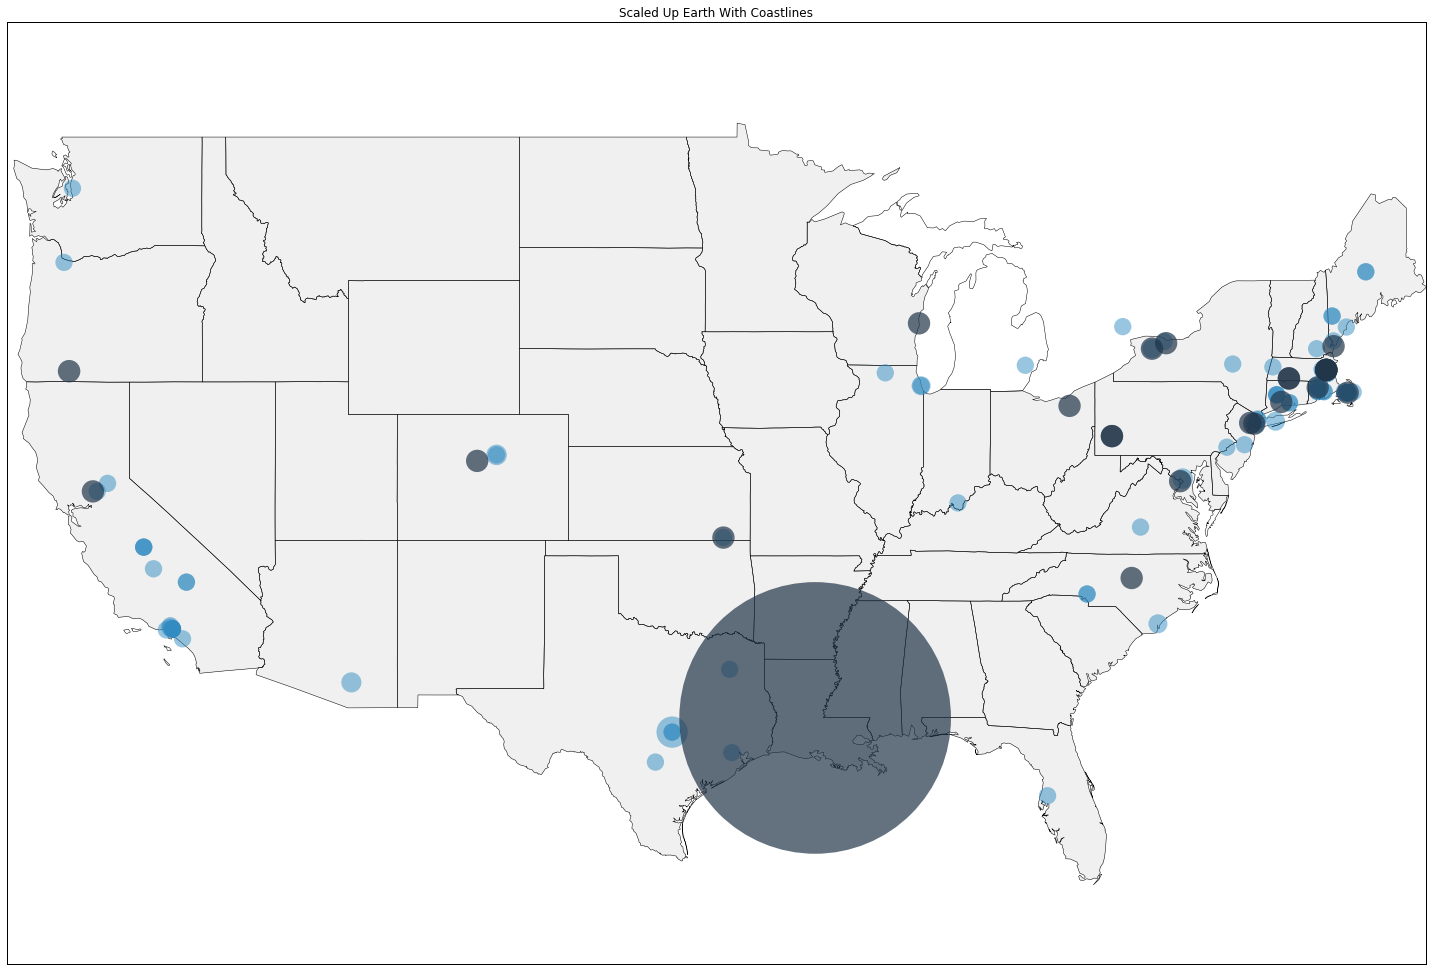

In [654]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_title("Scaled Up Earth With Coastlines")
#ax.set_axis_bgcolor('#EDEDED')
#m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m = Basemap(llcrnrlon=-125,llcrnrlat=22,urcrnrlon=-67,urcrnrlat=52,
            projection='merc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
m.readshapefile('states_21basic/states', name='states', drawbounds=True)
x_hp, y_hp = m(redsox_high_pos_df['longitude'].tolist(), redsox_high_pos_df['latitude'].tolist())
x_hn, y_hn = m(redsox_high_neg_df['longitude'].tolist(), redsox_high_neg_df['latitude'].tolist())
x_p, y_p = m(redsox_pos_df['longitude'].tolist(), redsox_pos_df['latitude'].tolist())
x_n, y_n = m(redsox_neg_df['longitude'].tolist(), redsox_neg_df['latitude'].tolist())
x_neu, y_neu = m(redsox_neutral_df['longitude'].tolist(), redsox_neutral_df['latitude'].tolist())

#m.scatter(x_hp, y_hp, s=retweet_count_hp, c='#e63946', alpha=0.6, edgecolor='none', zorder=10)
m.scatter(x_hn, y_hn, s=retweet_count_hn, c='#22364a', alpha=0.7, edgecolors='none', zorder=10)
#m.scatter(x_p, y_p, s=retweet_count_p, c='#eb6e80', alpha=0.6, edgecolors='none', zorder=9)
m.scatter(x_n, y_n, s=retweet_count_n, c='#328cc1', alpha=0.5, edgecolors='none', zorder=9)
#m.scatter(x_neu, y_neu, s=retweet_count_neu, c='#f2b632', alpha=0.2, edgecolors='none', zorder=10)

#m.scatter(x, y, s=retweet_count, c=dates, cmap=my_cmap, alpha=0.5, edgecolors='white')

#m.drawstates(color='green')
#m.drawcoastlines(color='black')
#m.drawcoastlines(color='#32b181')

state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['STATE_ABBR'])

for state in state_names:
    seg = m.states[state_names.index(state)]
    poly = Polygon(seg, facecolor='#f0f0f0', edgecolor='none')
    ax.add_patch(poly)

plt.tight_layout()
#plt.colorbar()
plt.show()

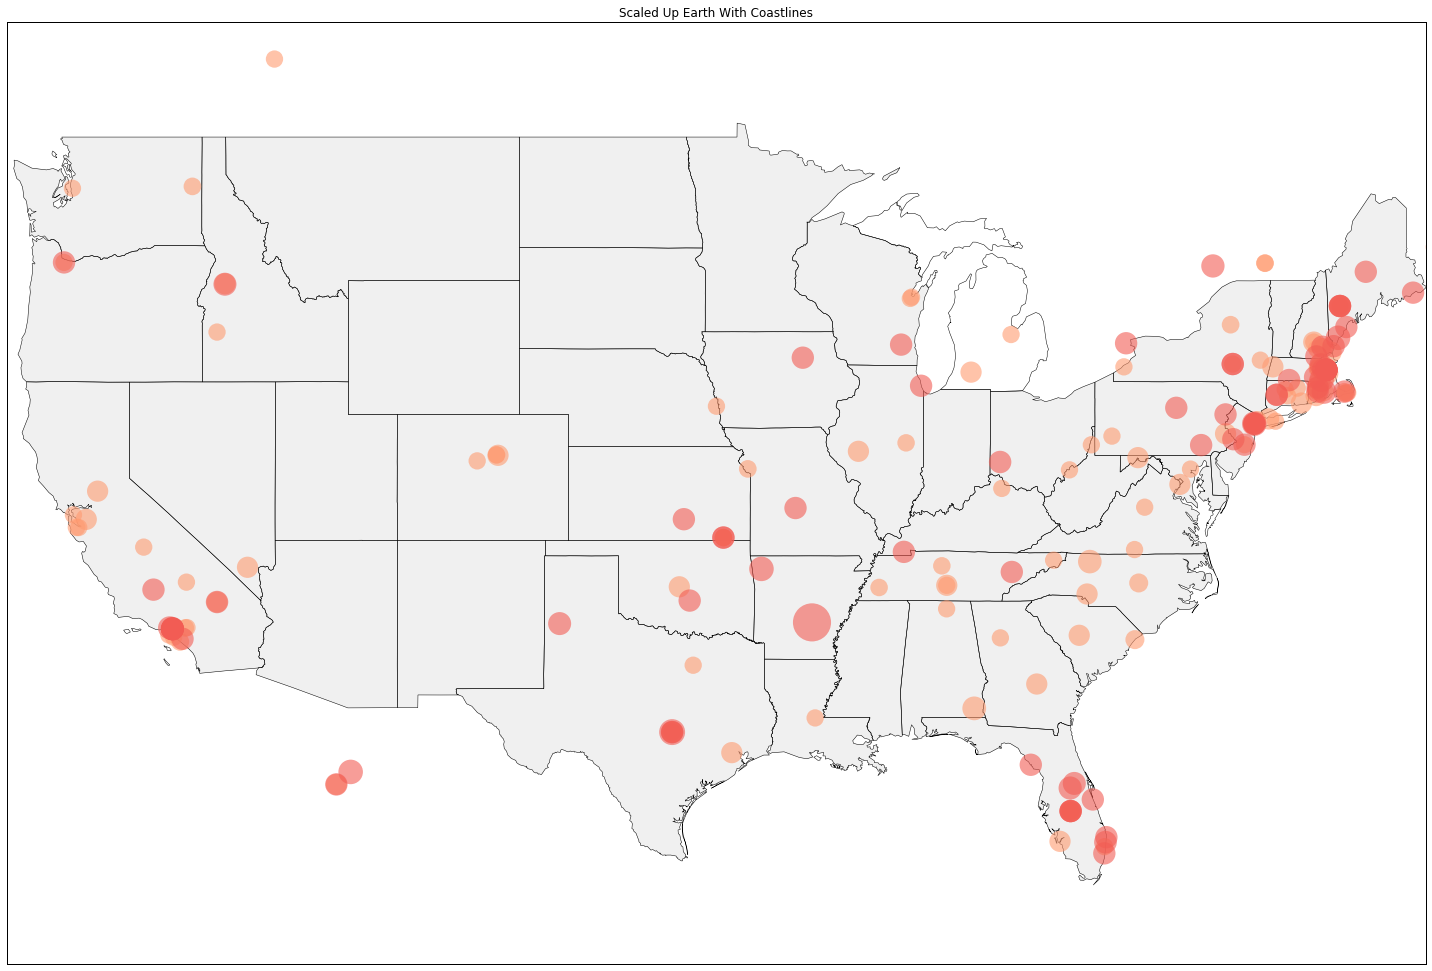

In [684]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_title("Scaled Up Earth With Coastlines")
#ax.set_axis_bgcolor('#EDEDED')
#m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m = Basemap(llcrnrlon=-125,llcrnrlat=22,urcrnrlon=-67,urcrnrlat=52,
            projection='merc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
m.readshapefile('states_21basic/states', name='states', drawbounds=True)
x_hp, y_hp = m(redsox_high_pos_df['longitude'].tolist(), redsox_high_pos_df['latitude'].tolist())
x_hn, y_hn = m(redsox_high_neg_df['longitude'].tolist(), redsox_high_neg_df['latitude'].tolist())
x_p, y_p = m(redsox_pos_df['longitude'].tolist(), redsox_pos_df['latitude'].tolist())
x_n, y_n = m(redsox_neg_df['longitude'].tolist(), redsox_neg_df['latitude'].tolist())
x_neu, y_neu = m(redsox_neutral_df['longitude'].tolist(), redsox_neutral_df['latitude'].tolist())

m.scatter(x_hp, y_hp, s=retweet_count_hp, c='#F25C54', alpha=0.6, edgecolor='none', zorder=10)
#m.scatter(x_hn, y_hn, s=retweet_count_hn, c='#22364a', alpha=0.7, edgecolors='none', zorder=10)
m.scatter(x_p, y_p, s=retweet_count_p, c='#FF9B71', alpha=0.6, edgecolors='none', zorder=9)
#m.scatter(x_n, y_n, s=retweet_count_n, c='#328cc1', alpha=0.5, edgecolors='none', zorder=9)
#m.scatter(x_neu, y_neu, s=retweet_count_neu, c='#f2b632', alpha=0.2, edgecolors='none', zorder=10)

#m.scatter(x, y, s=retweet_count, c=dates, cmap=my_cmap, alpha=0.5, edgecolors='white')

#m.drawstates(color='green')
#m.drawcoastlines(color='black')
#m.drawcoastlines(color='#32b181')

state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['STATE_ABBR'])

for state in state_names:
    seg = m.states[state_names.index(state)]
    poly = Polygon(seg, facecolor='#f0f0f0', edgecolor='none')
    ax.add_patch(poly)

plt.tight_layout()
#plt.colorbar()
plt.show()

## Plotly ##

Abandoned this pursuit for Carto (formerly CartoDB).

In [685]:
import plotly.plotly as py

In [688]:
tweets = []
colors = ['rgb(242,92,84)', 'rgb(255,155,113)', 'rgb(239,234,227)', 'rgb(50,140,193)', 'rgb(34,54,74)']
sentiment = {1:'Highly Positive', 2:'Positive', 3:'Neutral', 4:'Negative', 5:'Highly Negative'}

In [ ]:
hp_tweets = dict(
                type = 'scattergeo',
                locationmode = 'USA-states',
                lon = redsox_high_pos_df['longitude'],
                lat = redsox_high_pos_df['latitude'],
                sizemode = 'diameter'
                name = 'sentiment[1]'
                marker = dict(
                            size = retweet_count_hp,
                            colors = colors[1],
                            line = dict(width = 0)
                            )
                )

In [699]:
import plotly
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Scatter, Layout

init_notebook_mode()

iplot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})